# Multiple Linear Regression 

Now that we did univariate linear regression, It is now time to understand more about Multiple linear regression. Here, we will have output depending on more than one input variables. 

$$ Y(x_1,x_2,x_3,....) = W_1x_1+W_2x_2+W_3x_3+.....$$

We will use a dataset about house prices as a function of different features like number of bathrooms, zipcode, floors and area of house along with condition.

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.shape

(21613, 21)

Now, we will find the correlation matrix which will tell us about the dependence of all the input variables on each other as well as on the output variables.

/tmp/ipykernel_8771/900504094.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


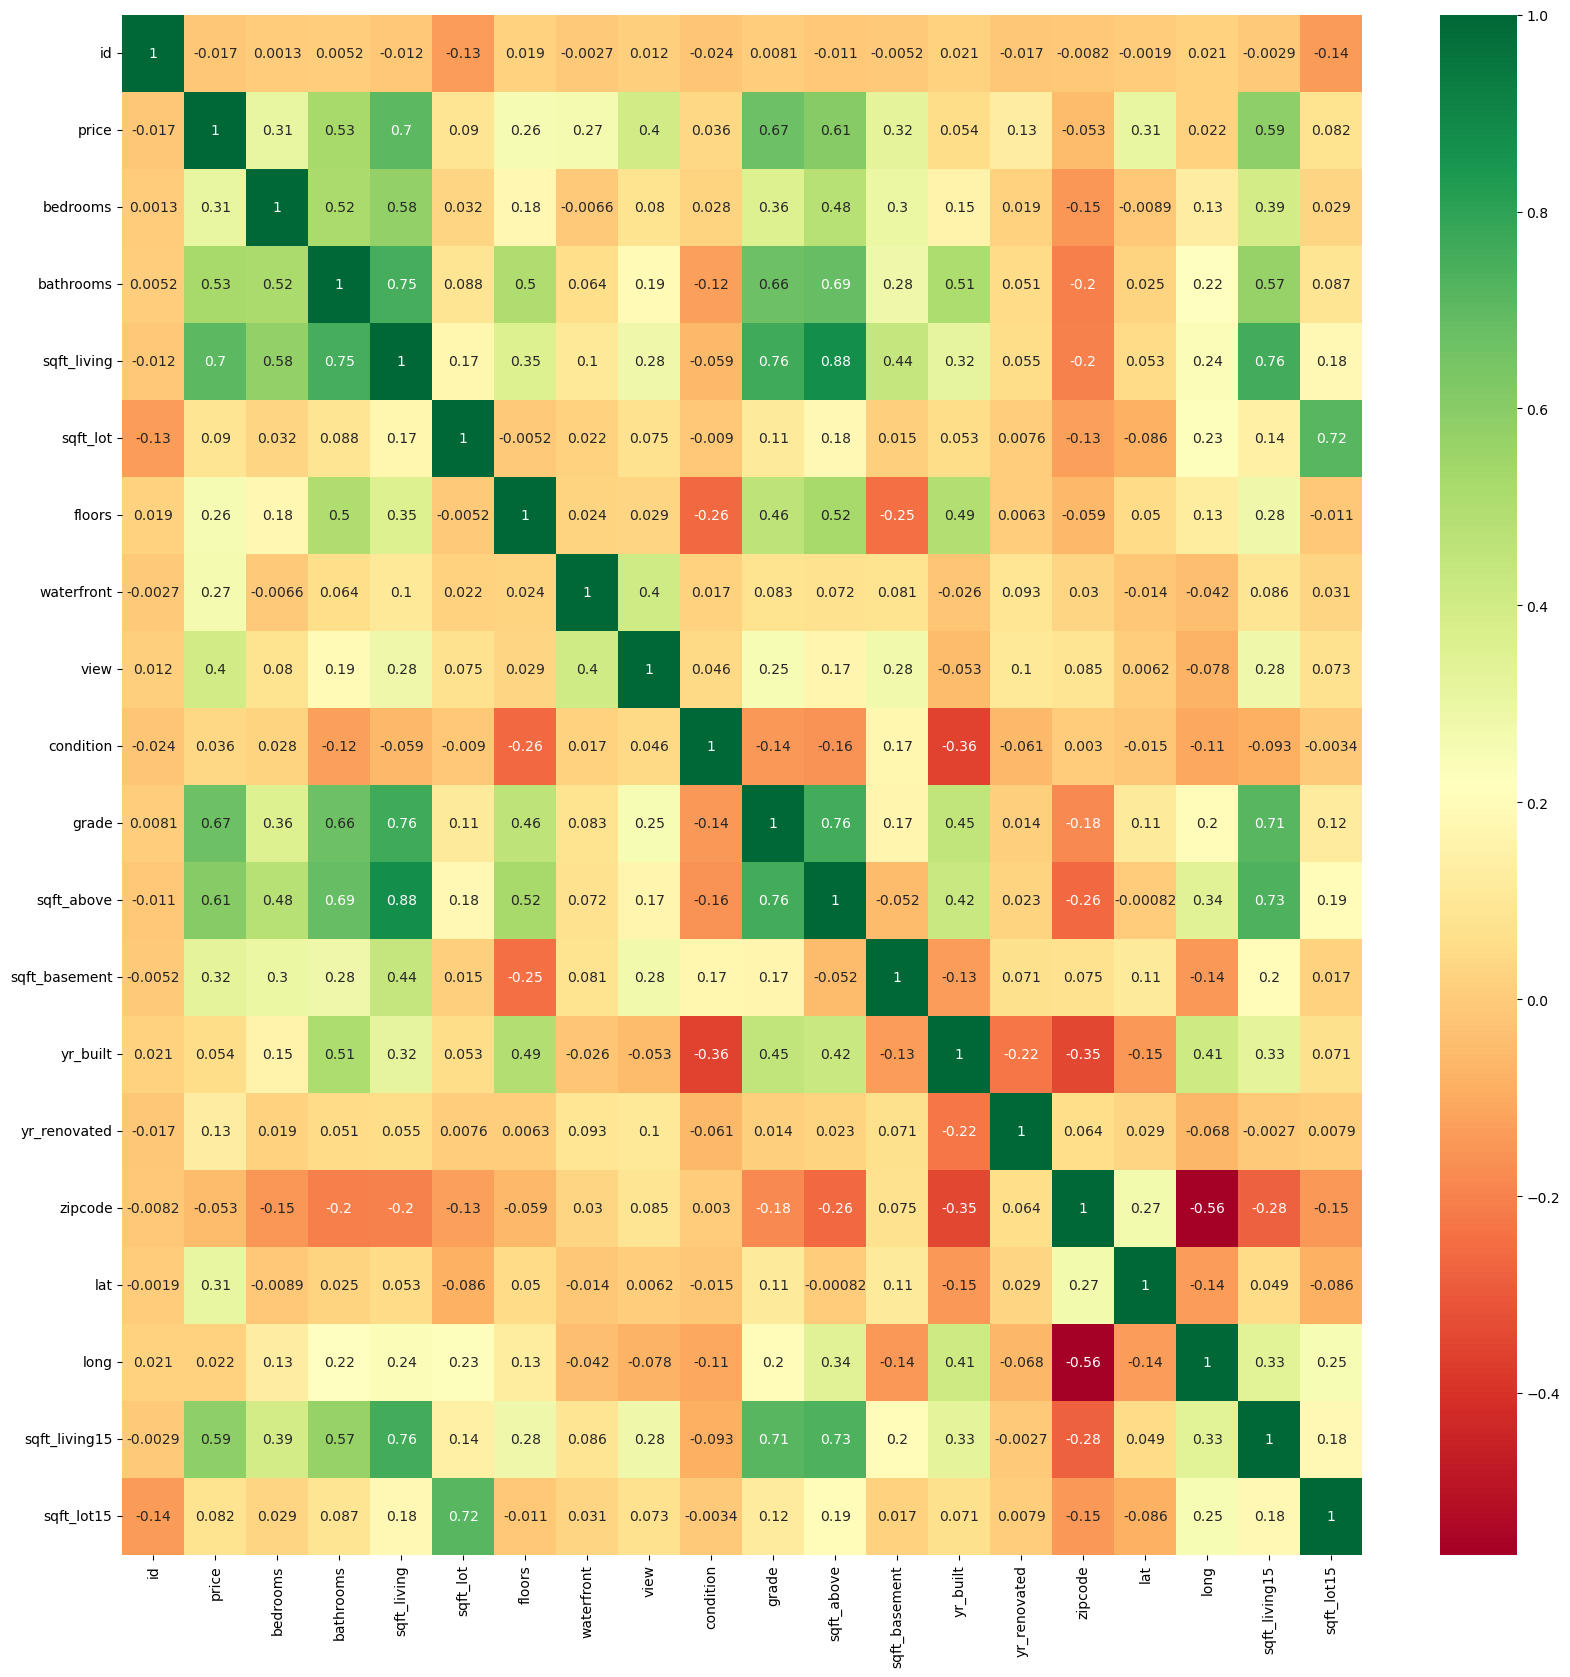

In [3]:
corr_matrix = dataset.corr()
corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[corr_features].corr(),annot=True,cmap="RdYlGn")

As we can see from the above heatmap the price does not depend on the id of the house which is quite 
intuitive. We can also sense some correlation in the sqft_living, sqft_above and bathrooms.

We will calculate the VIF of the variables now to identify which variables to drop.

In [4]:
# We are dropping zipcode, latitude and longitude columns as we do not expect them to have a linear relationship with the price.
# id, date won't have  any significance related to the price therefore we drop them from the dataset.
# yr_renovated, sqft_above and yr_built have been dropped because we wanted to have independent variables for the model.

X=dataset.drop(["price","date","id",'zipcode','lat','long','yr_renovated','sqft_above','yr_built',], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         features  vif_Factor
0        bedrooms   20.662594
1       bathrooms   24.917224
2     sqft_living   29.309951
3        sqft_lot    2.364605
4          floors   15.917238
5      waterfront    1.207270
6            view    1.492498
7       condition   21.107708
8           grade   68.180283
9   sqft_basement    2.615966
10  sqft_living15   26.317104
11     sqft_lot15    2.569635


In [5]:
weights = np.full(len(X.columns),100)
bias = 0
no_of_epochs = 10000
lr = 0.001
loss,loss1=[],[]
X.head(10)
X['sqft_living'] /= np.std(X['sqft_living'], axis = 0)
X['sqft_lot'] /= np.std(X['sqft_lot'], axis = 0)
X['sqft_living15']/= np.std(X['sqft_living15'], axis = 0)
X['sqft_lot15']/= np.std(X['sqft_lot15'], axis = 0)
X['sqft_basement']/= np.std(X['sqft_basement'], axis = 0)
Y = (dataset.iloc[:,:])["price"]
Y /= np.std(Y, axis = 0)
Y_train = Y.iloc[:15000]
Y_val = Y.iloc[15000:]

In [6]:
train_data = X.iloc[:15000,:]
val_data = X.iloc[15000:,:]

In [ ]:
for epoch in range(no_of_epochs):
   y_pred = np.matmul(train_data.values, weights) + bias
   train_loss = ((y_pred - Y_train)**2).mean()
   dloss = 2*(y_pred - Y_train)
   for i in range(len(X.columns)):
     grad = (dloss*train_data.iloc[0:,i]).mean()
     weights[i] = weights[i] - (grad*lr)
   bias = bias - (dloss.mean())*lr
   loss.append(train_loss)
   if (epoch+1)%100 == 0:
    print("For {}th iteration, the training loss is {}".format(epoch+1,train_loss))
   predict_data = np.matmul(val_data.values,weights)+ bias
   val_loss = ((predict_data - Y_val)**2).mean()
   loss1.append(val_loss)

For 100th iteration, the training loss is 164.24860146282353
For 200th iteration, the training loss is 49.12282798581374
For 300th iteration, the training loss is 46.525171323609726
For 400th iteration, the training loss is 44.48133381361474
For 500th iteration, the training loss is 41.36344734350423
For 600th iteration, the training loss is 41.470048906749824
For 700th iteration, the training loss is 37.465718702185825
For 800th iteration, the training loss is 34.78261078667847
For 900th iteration, the training loss is 32.98478999806011
For 1000th iteration, the training loss is 31.71046357252801
For 1100th iteration, the training loss is 29.21795145934885
For 1200th iteration, the training loss is 27.547839695652094
For 1300th iteration, the training loss is 27.173392936310016
For 1400th iteration, the training loss is 24.641209607498542
For 1500th iteration, the training loss is 22.94451608174839
For 1600th iteration, the training loss is 24.008790007830914
For 1700th iteration, the

In [ ]:
plt.figure()
plt.plot(loss[:100])
plt.xlabel("Number of iterations")
plt.ylabel("Training Loss")

plt.figure()
plt.plot(loss1[:100])
plt.xlabel("Number of iterations")
plt.ylabel("Validation loss")
plt.show()

# Multiple Linear Regresssion using Scikit-Learn

In [ ]:
data = pd.read_csv('kc_house_data.csv')


In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(data.drop(['price','id','date'],axis =1), data['price'], test_size = 0.2, random_state = 42)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is",score)
print("mean_sqrd_error is ",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is ",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.7011904448878554
mean_sqrd_error is  45173046132.78801
root_mean_squared error of is  212539.5166381725
